In [577]:
import pandas as pd
import numpy as np
from numpy import e
import nest_asyncio
import sklearn
import tensorflow as tf
import tensorflow_federated as tff
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import defaultdict, OrderedDict
from clientClass import Client
from Server import Server
from phe import paillier
import sys
import matplotlib.pyplot as plt

del sys.modules['dataFunction']
from dataFunction import import_data, new_df, data_prep, make_dummies
nest_asyncio.apply()
np.random.seed(10)
tf.random.set_seed(10)
tff.framework.set_default_context(tff.backends.native.create_thread_debugging_execution_context(clients_per_thread=50))

# Make Dataframes for every dataset

In [524]:

cleveland = "processed.cleveland.data"
switzerland = "processed.switzerland.data"
va = "processed.va.data"
hungarian = "reprocessed.hungarian.data"
cleveland_df, switzerland_df, va_df, hungarian_df = import_data(cleveland, switzerland, va, hungarian)
df = new_df(cleveland_df, switzerland_df, va_df, hungarian_df)

In [525]:
hungarian_df = df[df.Location == 'Hungarian'].drop(columns=['Location'])
switzerland_df = df[df.Location == 'Switzerland'].drop(columns=['Location'])
cleveland_df = df[df.Location == 'Cleveland'].drop(columns=['Location'])
va_df = df[df.Location == 'VA'].drop(columns=['Location'])

In [526]:
n_clients = 4
df_dict ={
    'Cleveland': cleveland_df,
    'Switzerland': switzerland_df,
    'VA Long Beach': va_df,
    'Hungary': hungarian_df        
    }
clients = []
for i in list(df_dict.keys()):
    location_data = df_dict.get(i)
    clients.append(Client(i, location_data.iloc[:,:-1], location_data.HeartDisease))
cat_feat = ['ChestPainType', 'RestingECG', 'ST_Slope']
clients[0].X = make_dummies(clients[0].X, cat_feat)

X_train, X_test, y_train, y_test = train_test_split(clients[0].X, clients[0].y, test_size=0.2, random_state=42)

# Encryption methods
-   Homomorphic Encryption (HE)
-   Differential Privacy (DP)
-   Secure Multiparty Computations (SMPC)

# HE
- Paillier
- linear 


In [424]:
def encrypt_vector(public_key, x):
    return [public_key.encrypt(i) for i in x]

In [425]:
for i in clients:
    pubkey, privkey = paillier.generate_paillier_keypair(n_length=60)
    i.set_pubkey(pubkey)
    # encrypt_vector(pubkey, i.X['Age'])

In [181]:

clients[0].X['cryptAge '] = encrypt_vector(clients[0].pubkey, clients[0].X['Age'])

In [263]:
# Define class for logistic regression with stochastic gradient descent

class LogisticRegression:
    def __init__(self, start, lr=0.01):
        self.lr = lr
        self.beta = start
    
    def __sigmoid(self, z):
        return 1 / (1 + e**(-1*z))
    
    def __loss(self, p, y):
        return (-y * np.log(p) - (1 - y) * np.log(1 - p)).sum()
    
    def fit(self, X, y):      
        z = np.dot(X, self.beta)
        p = self.__sigmoid(z)
        gradient = np.dot(X.T, (p - y)) / y.size
        self.beta -= self.lr * gradient
        loss = self.__loss(p, y)
        
    def predict_prob(self, X):
        return self.__sigmoid(np.dot(X, self.beta))
    
    def predict_loss(self, X, y):   
        p = self.__sigmoid(np.dot(X, self.beta))
        return self.__loss(p, y)
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold
    
    def beta(self):
        return self.beta
        
    
def log_loss_NB(naive_bayes_model, X, y):
    p = naive_bayes.predict_proba(chunk_test)[:,1]
    return (-y * np.log(p) - (1 - y) * np.log(1 - p)).sum()

In [338]:
from sklearn.linear_model import LogisticRegression
# encrypt_vector(clients[0].pubkey, clients[0].X['Age'])
# model = LogisticRegression()
# model.fit(X_train ,y_train)
# clients[0].X.iloc[:,1:]
# logistic_regression = LogisticRegression(lr=0.1, start = np.zeros(clients[0].X.shape[1]+1)) # Initialize regression object

In [523]:


# chunk_train, chunk_test, y_train, y_test = train_test_split(chunk, y_chunk, test_size=0.2, random_state=42)

# logistic_regression.fit(chunk_train,y_train)

In [522]:
X_train, X_test, y_train, y_test = train_test_split(clients[0].X, clients[0].y, test_size=0.2, random_state=42)

In [435]:
clients[0].y = encrypt_vector(clients[0].pubkey, clients[0].y)

In [428]:
for feature in clients[0].X.columns:
    feature_name = feature + '_encrypt'  
    encrypt = pd.Series(encrypt_vector(clients[0].pubkey, clients[0].X[feature]), name=feature_name )
    clients[0].X = pd.concat([clients[0].X, encrypt], axis=1)
    clients[0].X = clients[0].X.drop(feature, axis = 1)

In [439]:
# y_train

In [229]:
X_train = np.hstack((X_train, np.atleast_2d(encryp_var).T))

In [287]:
# for i in X_train:
#     print(i)
beta = np.zeros(clients[0].X.shape[1]+1)
z = np.dot(X_train, beta)
z[0].ciphertext()

9562283392411349110533454692164736441637392448349508354186222223585670184584081709419827656104449425454822269499970882819351678044689137190392369305737491392239374065549763211001313602286120525498874283017517217456934472612078199408405665000801333478723092406845006671735725922261143982982648329047798796147446386239313571436987650323375709813449064873285772628463086053100118868967585347372650102619117044276551450703896535253071798596720534441400791516808209669090787237514542359078567479460171894683516695797688360422529194793402586460553349635597181786208429685580196957033921913552585264315413070894817681139936721297392458539170781133847828603254566678378291439764869160490293783654532861356878232816275080610710184297348461103461250643393138954066843811045202892258005431329100049719532257083429912067362431398401350578028891509247160494982723510891315827906839801771426118292302565353813298995581058239621821708013692208564027367557070934374013210329691678183188563229627418141338912680807056

In [594]:

pubkey, privkey = paillier.generate_paillier_keypair(n_length=60)
age1 = X_train[0][0]

M1 = pubkey.encrypt(age1)
print(M1.ciphertext())
# print(clients[0].pubkey.encrypt(X_train[0][0]))

KeyError: 0

In [319]:
X_train[0][0]

-2.8191147424276726

In [339]:
# pubkey, privkey = paillier.generate_paillier_keypair(n_length=50)
# pubkey.encrypt(2.1).ciphertext()

In [606]:
x_tttt =1
y_tttt =3
X_tttt_en = pubkey.encrypt(1/x_tttt)
privkey.decrypt(y_tttt*X_tttt_en)


3.0

In [602]:
pubkey.encrypt(3).ciphertext()

102930719792505648782677451942371551

In [597]:
# encryp_var = encrypt_vector(clients[0].pubkey,X_train[:,0])

# Differential privacy


In [343]:
tf.compat.v1.disable_v2_behavior()

import tensorflow_privacy

from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy

tf.get_logger().setLevel('ERROR')

In [449]:
for i in X_train:
    for j in X_train[i]:
        X_train[i] = j.ciphertext()



In [454]:
for i in X_test:
    for j in X_test[i]:
        X_test[i] = j.ciphertext()


In [479]:
# for i in range(len(y_train)+1):
#     if 
#     y_train[i] = y_train[i].ciphertext()

In [452]:
# y_train = [i.ciphertext() for i in y_train]

In [458]:
type(y_train[0])

int

In [455]:
y_test = [i.ciphertext() for i in y_test]

In [463]:
y_test[0]

398851416007926900744051775508806248

## Random forest

In [390]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score

In [527]:
parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 50, 
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 6,
              'max_leaf_nodes': None}

RF_model = RandomForestClassifier(**parameters)
RF_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=10, n_estimators=50)

In [528]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=10, n_estimators=50)

In [529]:
RF_predictions = RF_model.predict(X_test)
score = accuracy_score(y_test ,RF_predictions)
print(score)

0.7868852459016393


## Neural network

In [530]:
optimizer = tensorflow_privacy.DPKerasSGDOptimizer(
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
    num_microbatches=num_microbatches,
    learning_rate=learning_rate)

    

In [546]:
clients[0].X.columns

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'ChestPainType_1.0', 'ChestPainType_4.0',
       'ChestPainType_3.0', 'ChestPainType_2.0', 'RestingECG_2.0',
       'RestingECG_0.0', 'RestingECG_1.0', 'ST_Slope_3.0', 'ST_Slope_2.0',
       'ST_Slope_1.0'],
      dtype='object')

In [568]:
feature_columns = []
for i in cleveland_df:  
    if i != 'HeartDisease':
        feature_columns.append(tf.feature_column.numeric_column(i))

In [559]:
def create_dataset(dataframe, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('HeartDisease')
  return tf.data.Dataset.from_tensor_slices((dict(dataframe), labels)) \
          .shuffle(buffer_size=len(dataframe)) \
          .batch(batch_size)

In [563]:
RANDOM_SEED =20
train, test = train_test_split(
  cleveland_df,
  test_size=0.2,
  random_state=RANDOM_SEED
)

train_ds = create_dataset(train)
test_ds = create_dataset(test)

In [562]:
cleveland_df = make_dummies(cleveland_df, cat_feat)

In [591]:
model = tf.keras.models.Sequential([
  tf.keras.layers.DenseFeatures(feature_columns=feature_columns),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(units=2, activation='sigmoid')
])

model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy']
)

history = model.fit(train_ds, validation_data=test_ds, epochs=300, verbose=True, use_multiprocessing=True)

Train on 8 steps, validate on 2 steps
Epoch 1/300
8/8 [==============================] - 1s 76ms/step - batch: 3.5000 - size: 1.0000 - loss: 3.8471 - acc: 0.5248 - val_loss: 1.5072 - val_acc: 0.5492
Epoch 2/300
8/8 [==============================] - 0s 5ms/step - batch: 3.5000 - size: 1.0000 - loss: 2.4917 - acc: 0.5103 - val_loss: 0.6828 - val_acc: 0.6230
Epoch 3/300
8/8 [==============================] - 0s 5ms/step - batch: 3.5000 - size: 1.0000 - loss: 2.0681 - acc: 0.5475 - val_loss: 0.8695 - val_acc: 0.5902
Epoch 4/300
8/8 [==============================] - 0s 5ms/step - batch: 3.5000 - size: 1.0000 - loss: 1.8045 - acc: 0.5269 - val_loss: 0.7741 - val_acc: 0.5984
Epoch 5/300
8/8 [==============================] - 0s 5ms/step - batch: 3.5000 - size: 1.0000 - loss: 1.5167 - acc: 0.5517 - val_loss: 0.5706 - val_acc: 0.7459
Epoch 6/300
8/8 [==============================] - 0s 5ms/step - batch: 3.5000 - size: 1.0000 - loss: 1.4020 - acc: 0.5351 - val_loss: 0.6567 - val_acc: 0.6311
E

In [541]:
checkpoint_name = 'Weights-{epoch:03d}-{val_acc:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_acc', verbose = 1, save_best_only = True, mode ='max')
callbacks_list = [checkpoint]

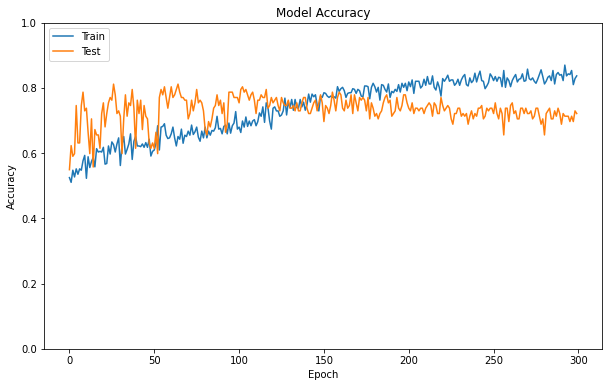

In [592]:
plt.figure(figsize =(10, 6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim((0, 1))
plt.legend(['Train', 'Test'], loc='upper left');

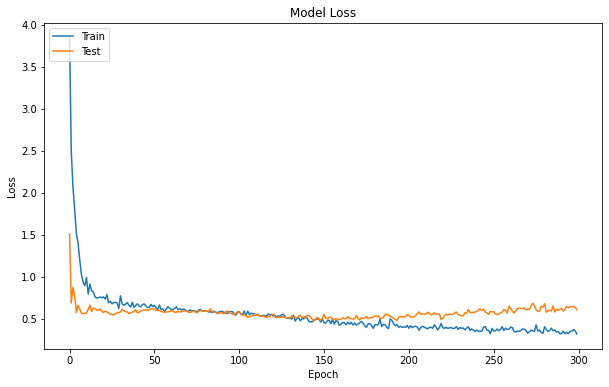

In [593]:
plt.figure(figsize =(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [589]:
predictions = model.predict(test_ds)
# bin_predictions = 
# predictions)
predictions

array([[0.4933114 , 0.4891999 ],
       [0.6117399 , 0.62835884],
       [0.06430629, 0.07348382],
       [0.21639809, 0.22788242],
       [0.8365073 , 0.85269797],
       [0.78826594, 0.7596522 ],
       [0.5529521 , 0.5331757 ],
       [0.15697879, 0.16361171],
       [0.1405516 , 0.12736943],
       [0.8608403 , 0.8599888 ],
       [0.02447352, 0.0307447 ],
       [0.6688445 , 0.63541085],
       [0.71244365, 0.70871675],
       [0.29859334, 0.3155767 ],
       [0.06000218, 0.05644387],
       [0.25270712, 0.23295355],
       [0.8485402 , 0.87899065],
       [0.02366969, 0.0358175 ],
       [0.32671463, 0.3145962 ],
       [0.31574047, 0.30341312],
       [0.03280753, 0.03214249],
       [0.8455738 , 0.8236328 ],
       [0.4953224 , 0.48924914],
       [0.00566015, 0.00538138],
       [0.42457077, 0.42215464],
       [0.93734556, 0.9455478 ],
       [0.9331922 , 0.9247814 ],
       [0.03458381, 0.04731491],
       [0.827996  , 0.83502746],
       [0.18881142, 0.20797423],
       [0.

In [542]:
X_train

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_1.0,ChestPainType_4.0,ChestPainType_3.0,ChestPainType_2.0,RestingECG_2.0,RestingECG_0.0,RestingECG_1.0,ST_Slope_3.0,ST_Slope_2.0,ST_Slope_1.0
132,29.0,1.0,130.0,204.0,0.0,202.0,0.0,0.0,0,0,0,1,1,0,0,0,0,1
202,57.0,1.0,150.0,126.0,1.0,173.0,0.0,0.2,0,0,1,0,0,1,0,0,0,1
196,69.0,1.0,160.0,234.0,1.0,131.0,0.0,0.1,1,0,0,0,1,0,0,0,1,0
75,65.0,0.0,160.0,360.0,0.0,151.0,0.0,0.8,0,0,1,0,1,0,0,0,0,1
176,52.0,1.0,108.0,233.0,1.0,147.0,0.0,0.1,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,54.0,1.0,192.0,283.0,0.0,195.0,0.0,0.0,0,0,0,1,1,0,0,0,0,1
71,67.0,1.0,125.0,254.0,1.0,163.0,0.0,0.2,0,1,0,0,0,1,0,0,1,0
106,59.0,1.0,140.0,177.0,0.0,162.0,1.0,0.0,0,1,0,0,0,1,0,0,0,1
270,61.0,1.0,140.0,207.0,0.0,138.0,1.0,1.9,0,1,0,0,1,0,0,0,0,1


In [570]:
model.evaluate(test_ds)

[0.579225480556488, 0.704918]

In [574]:
predictions = tf.round(model.predict(test_ds))
predictions

<tf.Tensor 'Round_3:0' shape=(61, 2) dtype=float32>

In [543]:
NN_model.fit(X_train, y_train, epochs=10)

ValueError: Dimension size must be evenly divisible by 250 but is 1 for '{{node training_12/Reshape}} = Reshape[T=DT_FLOAT, Tshape=DT_INT32](loss_20/mul, training_12/Reshape/shape)' with input shapes: [], [2] and with input tensors computed as partial shapes: input[1] = [250,?].

In [486]:
wights_file = './Weights-001-0.00000.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

In [491]:
y_train

[246319264148350358054669534987564173,
 177143461162040986851238976625108796,
 104812875922599433366178452340603918,
 178735323088735587838392349074683859,
 400586047243761177018558630754787647,
 64172410500943263505116508828072672,
 299228703610430305541100979502054017,
 320799565348619493446226659768112545,
 375958792426658685251948079487254474,
 146265733836052760139673702806348250,
 366414248620061194346475527046056571,
 393074351233137245268163578954865652,
 382035551214240326522065345326611112,
 373668759174376824953887084838549949,
 184792494315522827260270469318561352,
 390620943805124658977982345808440914,
 390054895760771789437971920745822774,
 257429311603635885765375570812073054,
 320784359760704950360125539925782488,
 122843032277651636956766112339680319,
 213616313964191207536875195965187077,
 120836570035771770819408863119288023,
 166666184910251508623329212138813915,
 392352656625530820349923204654925079,
 54916066556507139919176612870723182,
 40485536771777163054741522

In [487]:
predictions = NN_model.predict(X_test)
# round predictions
rounded = [round(x[0]) for x in predictions]
predictions = rounded
score = accuracy_score(y_test ,predictions)
print(score)

/Users/romyho/Documents/Master_Econometrie/Thesis/Python/thesis_fl/lib/python3.9/site-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


ValueError: Classification metrics can't handle a mix of unknown and binary targets